In [0]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [0]:
import os
from google.colab import drive

Download The Dataset & Define The Transforms

In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


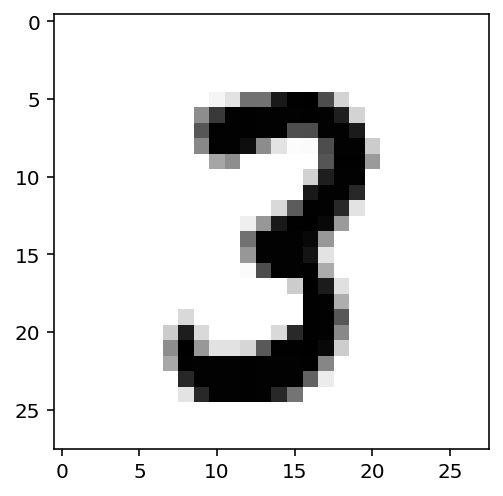

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

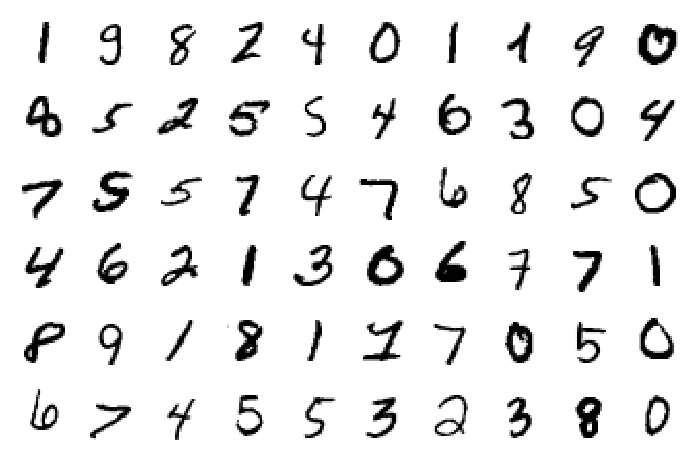

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [0]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [10]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0052,  0.0052,  0.0052,  ...,  0.0052,  0.0052,  0.0052],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [0]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [12]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0306, -0.0192, -0.0059,  ...,  0.0328,  0.0144,  0.0089],
        [ 0.0140, -0.0003, -0.0033,  ...,  0.0095, -0.0215, -0.0001],
        [ 0.0068,  0.0284, -0.0098,  ..., -0.0227,  0.0249, -0.0329],
        ...,
        [ 0.0077, -0.0273,  0.0053,  ..., -0.0007, -0.0215, -0.0357],
        [-0.0032,  0.0236, -0.0254,  ..., -0.0134, -0.0098,  0.0093],
        [-0.0118,  0.0046,  0.0244,  ..., -0.0042,  0.0184, -0.0326]],
       requires_grad=True)
Gradient - tensor([[ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        [-0.0047, -0.0047, -0.0047,  ..., -0.0047, -0.0047, -0.0047],
        [-0.0041, -0.0041, -0.0041,  ..., -0.0041, -0.0041, -0.0041],
        ...,
        [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [13]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 3.0551e-02, -1.9228e-02, -5.9069e-03,  ...,  3.2758e-02,
          1.4394e-02,  8.8825e-03],
        [ 1.4029e-02, -2.8532e-04, -3.2251e-03,  ...,  9.5651e-03,
         -2.1452e-02, -5.4758e-05],
        [ 6.8840e-03,  2.8484e-02, -9.7351e-03,  ..., -2.2632e-02,
          2.4918e-02, -3.2904e-02],
        ...,
        [ 7.6156e-03, -2.7384e-02,  5.2346e-03,  ..., -8.1720e-04,
         -2.1577e-02, -3.5752e-02],
        [-3.2241e-03,  2.3557e-02, -2.5402e-02,  ..., -1.3366e-02,
         -9.7886e-03,  9.3000e-03],
        [-1.1755e-02,  4.6481e-03,  2.4371e-02,  ..., -4.1856e-03,
          1.8435e-02, -3.2611e-02]], requires_grad=True)


In [0]:
### Core Training Of Neural Network

In [15]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6264141599443167
Epoch 1 - Training loss: 0.2769639351840085
Epoch 2 - Training loss: 0.2158104148206871
Epoch 3 - Training loss: 0.17535459150526442
Epoch 4 - Training loss: 0.14562738200089634
Epoch 5 - Training loss: 0.1262053730967107
Epoch 6 - Training loss: 0.10972876389667804
Epoch 7 - Training loss: 0.09761533301982925
Epoch 8 - Training loss: 0.08758655313386528
Epoch 9 - Training loss: 0.07989947622699509

Training Time (in minutes) = 2.168346854050954


In [0]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 7


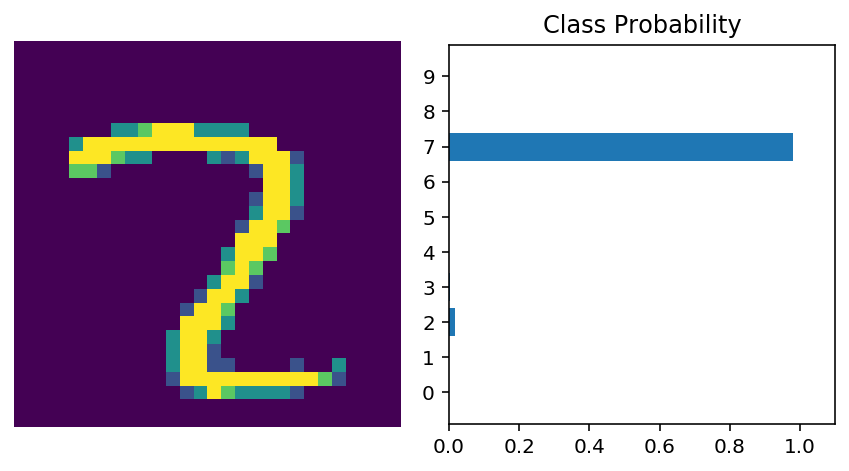

In [17]:

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [18]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9695


***Let's try for different learning rate and epoch:  (One Layer)***


In [19]:
learning_rt = [0.01,0.05,0.005,0.003,0.001]

for i in learning_rt:
  print("Learning rate :",i)
  optimizer = optim.SGD(model.parameters(), lr=i, momentum=0.9)
  time0 = time()
  epochs = 10
  accuracy = []
  for e in range(epochs):
      running_loss = 0
      for images, labels in trainloader:
          # Flatten MNIST images into a 784 long vector
          images = images.view(images.shape[0], -1)
      
          # Training pass
          optimizer.zero_grad()
          
          output = model(images)
          loss = criterion(output, labels)
          
          #This is where the model learns by backpropagating
          loss.backward()
          
          #And optimizes its weights here
          optimizer.step()
          
          running_loss += loss.item()

      else:
          print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
          correct_count, all_count = 0, 0
          for images,labels in valloader:
            for i in range(len(labels)):
              img = images[i].view(1, 784)
              # Turn off gradients to speed up this part
              with torch.no_grad():
                  logps = model(img)

              # Output of the network are log-probabilities, need to take exponential for probabilities
              ps = torch.exp(logps)
              probab = list(ps.numpy()[0])
              pred_label = probab.index(max(probab))
              true_label = labels.numpy()[i]
              if(true_label == pred_label):
                correct_count += 1
              all_count += 1
              accuracy1 =  correct_count/all_count
          #print("Number Of Images Tested =", all_count)
          print("\nModel Accuracy =", (correct_count/all_count))
          accuracy.append(accuracy1)
          print(accuracy)




Learning rate : 0.01
Epoch 0 - Training loss: 0.11685415122237032

Model Accuracy = 0.9647
[0.9647]
Epoch 1 - Training loss: 0.09337747627065014

Model Accuracy = 0.9626
[0.9647, 0.9626]
Epoch 2 - Training loss: 0.07855238690528014

Model Accuracy = 0.9645
[0.9647, 0.9626, 0.9645]
Epoch 3 - Training loss: 0.06970449904702715

Model Accuracy = 0.9716
[0.9647, 0.9626, 0.9645, 0.9716]
Epoch 4 - Training loss: 0.0595406091384548

Model Accuracy = 0.9697
[0.9647, 0.9626, 0.9645, 0.9716, 0.9697]
Epoch 5 - Training loss: 0.05183810626403856

Model Accuracy = 0.9729
[0.9647, 0.9626, 0.9645, 0.9716, 0.9697, 0.9729]
Epoch 6 - Training loss: 0.047292669818275915

Model Accuracy = 0.972
[0.9647, 0.9626, 0.9645, 0.9716, 0.9697, 0.9729, 0.972]
Epoch 7 - Training loss: 0.04563690603469689

Model Accuracy = 0.9728
[0.9647, 0.9626, 0.9645, 0.9716, 0.9697, 0.9729, 0.972, 0.9728]
Epoch 8 - Training loss: 0.035508368275131284

Model Accuracy = 0.9752
[0.9647, 0.9626, 0.9645, 0.9716, 0.9697, 0.9729, 0.972,